# 1.  eliminación de anomalías:

**Los filtros constituyen uno de los principales modos de operar en el procesamiento de
imágenes digitales. Los principales objetivos que se persiguen con la aplicación de filtros
son:**

**Suavizar la imagen:** reducir la cantidad de variaciones de intensidad entre píxeles vecinos.

**Eliminar ruido:** tratar aquellos píxeles cuyo nivel de intensidad es muy distinto al de sus vecinos.

**Realzar bordes:** 
Destacar los bordes de los objetos contenidos en una imagen.

**Detectar bordes:** 
Detectar los píxeles donde se produce un cambio brusco de
intensidad.

## INICIO

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#librerias
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

## Cargar el directorio
Se hace uso de la libreria "os" con la funcion "listdir" para acceder a la carpeta(CochesVarios)
donde se encuentran las imagenes. La variable dir contiene un diccionario con las listas
de nombre y formato de cada imagen.
## Seleccion de 2 imagenes aleatorias
Se utiliza la variable 'ruta' para concatenar la dirección de la carpeta con
la variable 'dir', que contiene en un diccionario los nombres de las imágenes y se guarda
en una nueva variable llamada 'img_ruta'.

Tambien se utiliza la funcion "random.randit" y como parametros el rango del tamaño del
directorio en este caso tenemos 27 imagenes. random.randit se utiliza al mandar a llamar la
variable "dir" para obtener una imagen aleatoria.

Cargamos la imagen en la variable "imagen01" utilizando la libreria de matplotlib "image" y su
funcion "imread".

por ultimo obtenemos tipo de formato de la imagen(jpg,jpeg,png) en la variable "formato01"
esto por que el tratamiento de imagenes es diferente para el tipo de formato png al jpg o jpeg.


In [3]:
def imagen_random():
    
    #Cargamos Directorio
    Directorio = os.listdir('CochesVarios/')

    #Seleccion de imagenes

    #imagen 1
    img_ruta = 'CochesVarios/' + Directorio[random.randint(0, 26)]
    imagen01 = mpimg.imread(img_ruta)
    formato01 = img_ruta.split('.'); formato01 = formato01[-1]

    #imagen 2
    img_ruta = 'CochesVarios/' + Directorio[random.randint(0, 26)]
    imagen02 = mpimg.imread(img_ruta)
    formato02 = img_ruta.split('.'); formato02 = formato02[-1]
    
    return imagen01,formato01,imagen02,formato02

## 1.2 **Agregar ruido Sal y Pimienta**
El ruido sal y pimienta se refiere a variaciones aleatorias en la intensidad o color de una imagen. Estas variaciones, generalmente, provienen durante la adquisición y/o transmisión de las imágenes. El resultado final de este ruido es que algunos píxeles cambian de manera impredecible hacia el valor máximo (similar al blanco, conocido como 'sal') o el valor mínimo (similar al negro, conocido como 'pimienta').

El ruido sal y pimienta en esta aplicacion toma valores de 0 y 255 para imagenes con formato jpg y valores 0 y 1 para imagenes con formato png.

#### Explicacion del codigo:
Se creó una función llamada 'ruido' con tres parámetros: Imagen, probabilidad de ruido y formato de la imagen. La razón por la cual se solicita el tipo de formato de la imagen es que permite ajustar la creación de la matriz de 'ruido' para trabajar con valores tipo float o int. De esta manera, es posible aplicar ruido a imágenes con formato 'png' y otras con formato 'jpg o jpeg'.

La probabilidad se divide entre 2 para modular el nivel de ruido. En otras palabras, sí se desea un 50% de ruido en una imagen de 100 píxeles, al proporcionar 0.5 como parámetro y dividir ese número entre 2, se obtiene un resultado de 25% de píxeles blancos y 25% de píxeles negros, logrando así un total del 50% de ruido deseado."

Probabilidad: 0.99 = 99% // 0.50 = 50%

#### Pasos a seguir
1.- Calcular el tamaño de la imagen; cantidad total de pixeles = filas x columnas

2.- Funcion random para obtener un numero al azar y comparar con la probabilidad.
Sí la probabilidad es mayor al numero dado se pintara de blanco o en efecto
contrario se pintara de negro. Si el valor no entra en la condicional el pixel se
pintara en el color de la imagen original.

3.- Recorrer la imagen pixel a pixel generando el ruido sal y pimienta en la imagen.

In [4]:
def ruido(imagen, probabilidad, formato):
    filas, columnas, _ = imagen.shape #Obtenemos las dimensiones de la imagen
    if formato == 'png': #condicionamos si el tipo de imagen es png
         matriz_ruido = np.zeros(imagen.shape, dtype='float64') # de ser asi tenemos una matriz de formato tipo flotate
    else:
        matriz_ruido = np.zeros(imagen.shape, np.uint8)# de lo contrario tipo entero

    for fila in range(filas): #recorremos pixel a pixel las dimensiones de la imagen
        for columna in range(columnas):
            num_random = random.random() #generamos un numero aleatorio de tipo entero
            if num_random < probabilidad /2: #generamos dos condiciones; para la matriz tipo entero y para la matriz tipo float
                matriz_ruido[fila][columna][:] = 0
            elif num_random > (1 - probabilidad / 2) and formato == 'png':
                matriz_ruido[fila][columna][:] = 1
            elif num_random > (1 - probabilidad / 2) and not formato == 'png':
                matriz_ruido[fila][columna][:] = 255
            else:
                matriz_ruido[fila][columna][:] = imagen[fila][columna][:]
    return matriz_ruido

## 1.3 Filtro - Mediana
El filtro de Mediana se fundamenta en estadistica, el cual representa el valor central de un conjunto de datos ordenados. Para aplicar el filtro en programacion es necasario el uso de un kernel que es básicamente una matriz. En este caso, se emplea tamaños de 3x3 y 5x5 para el kernel. Esta matriz actúa como una ventana que se desplaza por toda la imagen, realizando una operación llamada convolución en el dominio espacial.

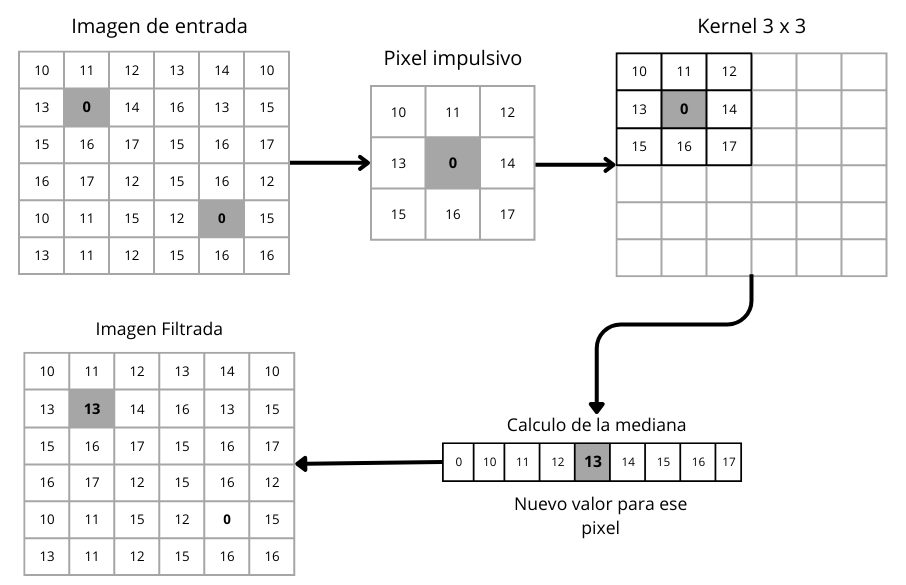

### Función
El centro de la ventana será colocado sobre cada píxel que tenga el valor 1, 0, 255. Los valores circundantes se oganizarán en un acomodo de mayor a menor, quedando el ruido en los extremos. Luego, se tomará la mediana como el nuevo valor para ese píxel, de esta manera eliminando el ruido. Los valores que no entren dentro de la condición quedarán con los valores de la imagen original, de esta manera no afectamos todos los valores de la imagen.

## **1.3.1 Filtro OpenCV - Filtro de media**
El filtro de OpenCV funciona únicamente con números enteros, es decir, con matrices en formato uint8. Por lo tanto, puede ser complicado aplicar el filtrado en imágenes con formato "png", ya que este tipo de imágenes contienen datos tipo float. Para superar esta limitación, simplemente se multiplica la imagen por 255 y cambiamos el formato de float a uint8. Con este ajuste, podemos utilizar el filtrado en OpenCV sin problemas.

In [5]:
def filtroCV(imagen, kernel, formato):
    if formato == 'png':
        imagenRuidoCV2 = (imagen*255).astype(np.uint8) #multiplicamos *255 y convetimos la matriz en tipo entero
        imagen_filtrada = cv.medianBlur(imagenRuidoCV2,kernel) #aplicamos filtro de mediana de opencv
        imagen_filtrada = (imagen_filtrada/255).astype(np.float32) #regresamos la imagen a los valores originales diviendo y regresando el formato
    else:
        imagen_filtrada = cv.medianBlur(imagen,kernel)

    return imagen_filtrada

### **1.3.2 Filtro propio - Filtro de mediana**
Para la propia implementación es importante iniciar por el tipo de formato para crear la matriz resultado. 
Dado que se esta trabajando con imágenes a color, se hace uso de los canales para aplicar los filtros a cada uno de ellos. 
Otro dato importante a considerar es que se va a omitir la primera fila de la imagen. 
Si no se hace de esa manera, obtendremos una línea negra o gris al inicio de la imagen.

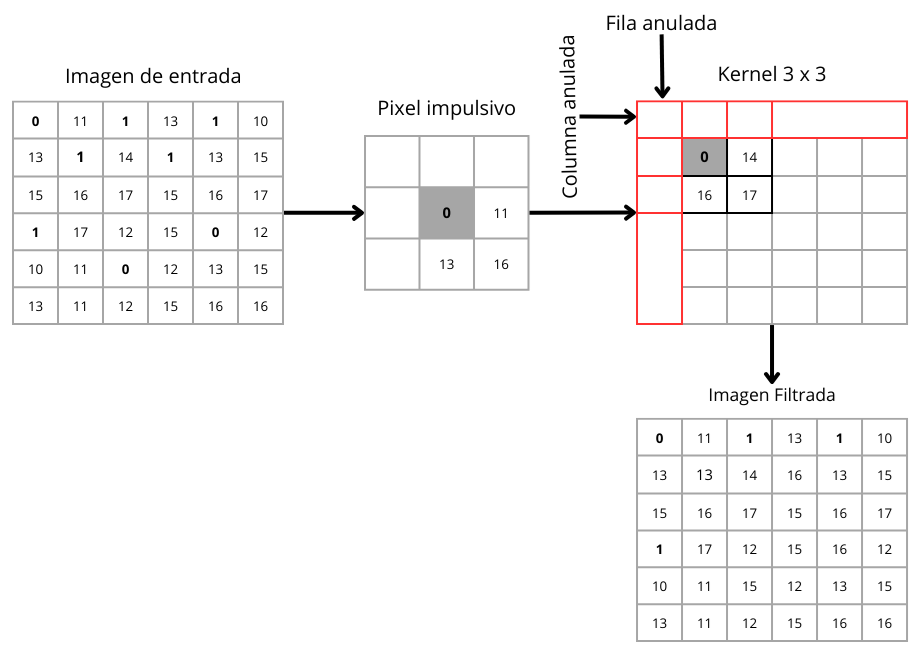

Después, con ciclos anidados, se recorre la imagen píxel a píxel por cada canal, buscando valores de "0, 1 o 255" en toda la imagen para realizar la implementación del kernel y la mediana en ese píxel específico. Los valores que no cumplan con esa condición serán los píxeles que corresponden al valor original de la imagen.

In [6]:
# Matriz kernel
def filtro(imagen, kernel, formato):
    filas, columnas, canales = imagen.shape #obtenemos las dimensiones y los canales de la imagen

    if formato == 'png':
        resultado = np.zeros(imagen.shape, dtype='float64') #matriz de 0 tipo flotante
    else:
        resultado = np.zeros(imagen.shape, dtype='uint8') #matriz de 0 tipo entero

    for canal in range(canales):
        for fila in range(filas):
            for columna in range(columnas):
                valor = imagen[fila][columna][canal]
                if (valor == 1 or valor == 0 or valor == 255) and fila >0 and columna >0: #dejamos pasar la primera fila y columna
                    Ventana = imagen[fila:fila + kernel, columna:columna + kernel, canal]#iniciamos en la 2da fila y le restamos 1 para obtener los datos de la fila que dejamos pasar
                    resultado[fila, columna, canal] = np.nanmedian(Ventana)# aplicamos la mediana a la ventana del kernel
                else:
                    resultado[fila,columna,canal] = imagen[fila,columna,canal]

    return resultado

## Medida de desempeño -  Error Cuadratico Medio
La implementación del error cuadrático medio nos proporciona un promedio entre las diferencias presentes entre la imagen original y la imagen filtrada. Un valor cercano a cero indica un rendimiento mejor del filtro, ya que refleja una mayor similitud entre la imagen filtrada y la imagen original.

In [7]:
#Error Cuadratico Medio
def MSE(imagenOriginal, imagenFiltrada): #imagen original vs imagen filtrada
    original,filtrada = np.array(imagenOriginal), np.array(imagenFiltrada)
    return np.square(np.subtract(original,filtrada)).mean() #resultado un valor promedio de la diferencia

In [8]:
def desempeno(probabilidad):
    #Cremos un diccionario para hacer un dataframe de los valores
    Directorio = os.listdir('CochesVarios/')
    list_MSE_CV2 = []
    list_MSE_Propio = []
    list_imagenes = []
    list_Diferencia = []
    list_kernel = []
    list_mayor = []

    diccionario = {
    "imagen" : [],
    "kernel" : [],
    "CV2 MSE" : [],
    "Propio MSE": [],
    "Diferencia": [],
    "mayor a 1": []
    }

    for seleccion in range(25): #rango de imagenes
        for kernel in [3,5]: #kernel de 3x3 y 5x5
            #Selecciond de imagen aleatoria
            img_ruta = 'CochesVarios/' + Directorio[random.randint(0, 27)]
            imagen_desempeno = mpimg.imread(img_ruta)
            formato01 = img_ruta.split('.'); formato_desenpeno = formato01[-1]

            #Agregar Ruido
            imagen_Ruido_Desempeno = ruido(imagen_desempeno, probabilidad, formato=formato_desenpeno)

            #FiltroOpenCV
            filtroCV2_desempeno = filtroCV(imagen_Ruido_Desempeno, kernel=kernel, formato=formato_desenpeno)

            #FiltroPropio
            filtroPropio_desempeno = filtro(imagen_Ruido_Desempeno, kernel=kernel, formato=formato_desenpeno)

            #Desempeño Cuantitativo
            DesempenoOpencv01 = MSE(imagen_desempeno,filtroCV2_desempeno)
            DesempenoPropio01 = MSE(imagen_desempeno,filtroPropio_desempeno)
            diferencia = abs(DesempenoOpencv01 - DesempenoPropio01)

            #Agregar los datos en el diccionario
            list_MSE_CV2.append(DesempenoOpencv01)
            list_MSE_Propio.append(DesempenoPropio01)
            list_imagenes.append(Directorio[seleccion])
            list_Diferencia.append(diferencia)
            list_kernel.append(kernel)
            if DesempenoOpencv01 >=1:
                list_mayor.append(True)
            else:
                list_mayor.append(False)

    diccionario["imagen"] = list_imagenes
    diccionario["kernel"] = list_kernel
    diccionario["CV2 MSE"] = list_MSE_CV2
    diccionario["Propio MSE"] = list_MSE_Propio
    diccionario["Diferencia"] = list_Diferencia
    diccionario["mayor a 1"] = list_mayor


    dataframe = pd.DataFrame(diccionario)
    return dataframe


# Funcion principal

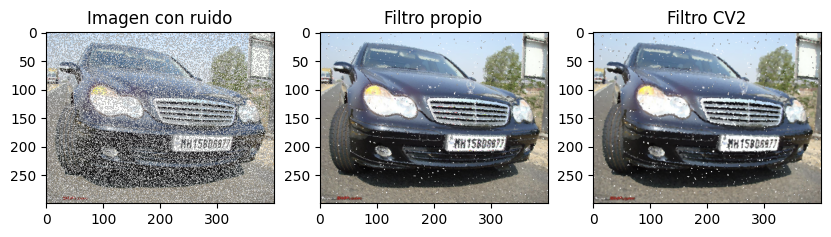

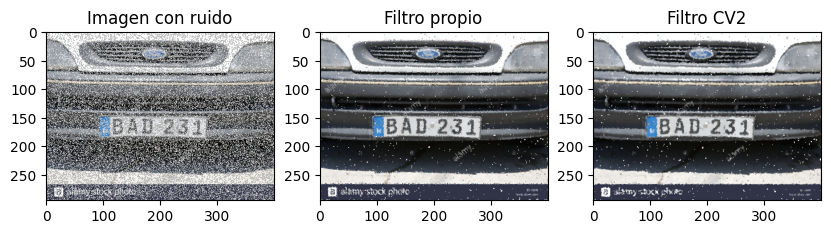

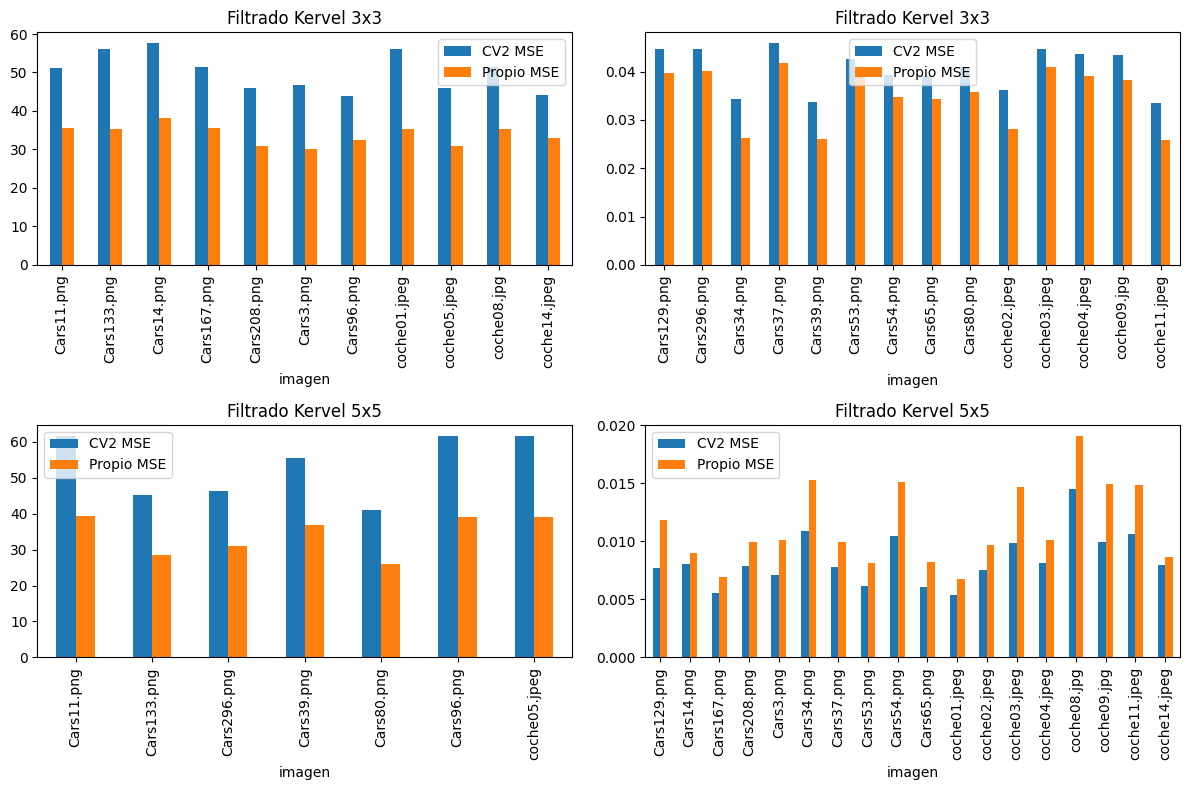

          imagen  kernel    CV2 MSE  Propio MSE  Diferencia  mayor a 1
0     Cars11.png       3  51.240606   35.516946   15.723660       True
1     Cars11.png       5  61.675779   39.426561   22.249218       True
2    Cars129.png       3   0.044575    0.039654    0.004921      False
3    Cars129.png       5   0.007717    0.011848    0.004131      False
4    Cars133.png       3  56.199515   35.265969   20.933546       True
5    Cars133.png       5  45.237217   28.600301   16.636916       True
6     Cars14.png       3  57.562661   38.168074   19.394587       True
7     Cars14.png       5   0.008009    0.008964    0.000954      False
8    Cars167.png       3  51.355404   35.594919   15.760485       True
9    Cars167.png       5   0.005578    0.006893    0.001315      False
10   Cars208.png       3  46.084437   30.921965   15.162472       True
11   Cars208.png       5   0.007834    0.009985    0.002151      False
12   Cars296.png       3   0.044594    0.040117    0.004477      False
13   C

In [16]:
#Seleccion de imagenes
imagen01,formato01,imagen02,formato02 = imagen_random()
# Agregar Ruido
imagenRuido1 = ruido(imagen01, probabilidad=0.30 ,formato=formato01)
imagenRuido2 = ruido(imagen02, probabilidad=0.30 ,formato=formato02)
#FiltroOpenCV
Filtro01_CV2 = filtroCV(imagenRuido1, kernel=3, formato=formato01)
Filtro02_CV2 = filtroCV(imagenRuido2, kernel=3, formato=formato02)
#FiltroPropio
filtro01_Mio = filtro(imagenRuido1, kernel=3, formato=formato01)
filtro02_Mio = filtro(imagenRuido2, kernel=3, formato=formato02)

#plot imagen 1
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10,6)
ax[0].imshow(imagenRuido1)
ax[0].set_title("Imagen con ruido")
ax[1].imshow(filtro01_Mio)
ax[1].set_title("Filtro propio")
ax[2].imshow(Filtro01_CV2)
ax[2].set_title("Filtro CV2")
plt.show()

#plot imagen 2
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10,6)
ax[0].imshow(imagenRuido2)
ax[0].set_title("Imagen con ruido")
ax[1].imshow(filtro02_Mio)
ax[1].set_title("Filtro propio")
ax[2].imshow(Filtro02_CV2)
ax[2].set_title("Filtro CV2")
plt.show()

#Desempeño Cuantitativo
#tomamos 25 imagenes para hacer el test
datos = desempeno(probabilidad=0.5)
dt_show = datos[["imagen", "kernel", "CV2 MSE", "Propio MSE","Diferencia"]]
dt_mayork3 = datos[(datos["mayor a 1"] == True) & (datos["kernel"] == 3)]
dt_menork3 = datos[(datos["mayor a 1"] == False) & (datos["kernel"] == 3)]
dt_mayork5 = datos[(datos["mayor a 1"] == True) & (datos["kernel"] == 5)]
dt_menork5 = datos[(datos["mayor a 1"] == False) & (datos["kernel"] == 5)]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Gráfico para Filtrado Kervel 3x3
dt_mayork3.plot(x="imagen", y=["CV2 MSE", "Propio MSE"], kind="bar", title="Filtrado Kervel 3x3", ax=axes[0, 0])
dt_menork3.plot(x="imagen", y=["CV2 MSE", "Propio MSE"], kind="bar", title="Filtrado Kervel 3x3", ax=axes[0, 1])

# Gráfico para Filtrado Kervel 5x5
dt_mayork5.plot(x="imagen", y=["CV2 MSE", "Propio MSE"], kind="bar", title="Filtrado Kervel 5x5", ax=axes[1, 0])
dt_menork5.plot(x="imagen", y=["CV2 MSE", "Propio MSE"], kind="bar", title="Filtrado Kervel 5x5", ax=axes[1, 1])
plt.tight_layout()
plt.show()
print(datos)

## **Resultados**
La comparación de resultados usando un 50% de ruido y un kernel de 3x3 revelan resultados muy similares en la eliminacion de ruido. Los análisis basados en el Error Cuadrático Medio (MSE) muestran una mejora en el prototipo en comparación con el filtro OpenCV. Sin embargo se ve una diferencia a favor de OpenCV al usar un kernel de 5x5 en algunas imagenes. No obstante, es importante tener en cuenta que el prototipo implica un mayor esfuerzo computacional. Este enfoque particular implica la replicación de píxeles de la imagen original que no son ni 255, 1 ni 0, lo que resulta en una mayor fidelidad a la imagen original. Por lo tanto, al realizar la comparación mediante MSE con la imagen original, los resultados favorecen al prototipo, aunque se debe considerar el costo computacional asociado.

# 2. Ajuste de intencidad - gamma

Para aplicar un ajuste de intencidad, se puede hacer basicamente de dos formas.

1. Trabajar a nivel de frecuencia de datos de la imagen, lo cual implica normalizar los datos asignando nuevos valores en un rango máximo de 0 a 255.

2. Trabajar píxel a píxel utilizando una matriz de convolución, similar al ejercicio anterior, recorriendo toda la imagen y aplicando cálculos para normalizar la imagen píxel a píxel.

En este caso, hemos abordado la solución basándonos en el primer enfoque, ajustando la intensidad de la imagen al trabajar sobre su frecuencia.

formula:

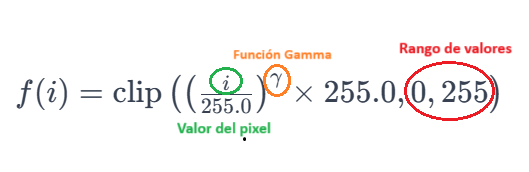

Nota: Un valor gamma mayor a 1 incrementa el contraste en las zonas oscuras, mientras que un valor inferior a 1 disminuirá el contraste y realzará las zonas claras.

## Seleccion de imagen e historigrama de valores


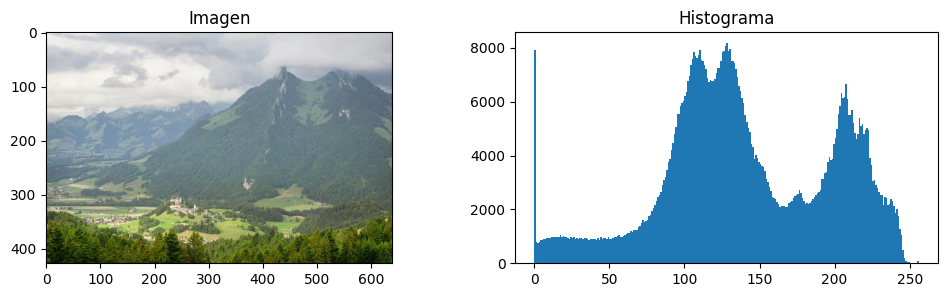

In [7]:
Directorio = os.listdir('Contraste/')
ruta = 'Contraste/'
img_ruta = ruta + Directorio[0]
imagen = mpimg.imread(img_ruta)

#plots
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,3)
ax[0].imshow(imagen)
ax[0].set_title("Imagen")
ax[1].hist(imagen.ravel(),256,[0,256])
ax[1].set_title("Histograma")
plt.show()

## Correción de datos
Para manipular los datos de una imagen a color a nivel de frecuencia, es necesario realizar la transición del plano tridimensional al unidimensional. En este proceso, hemos empleado la función flatten, que nos proporciona un array unidimensional de la imagen a color.

La matriz de corrección desempeña un papel fundamental en la normalización de los datos. Su contenido varía en función de la variable gamma. Si gamma es mayor a 1, observaremos una mayor frecuencia de datos en las zonas oscuras; en cambio, si gamma es menor a 1, experimentaremos una mayor frecuencia en las zonas claras.

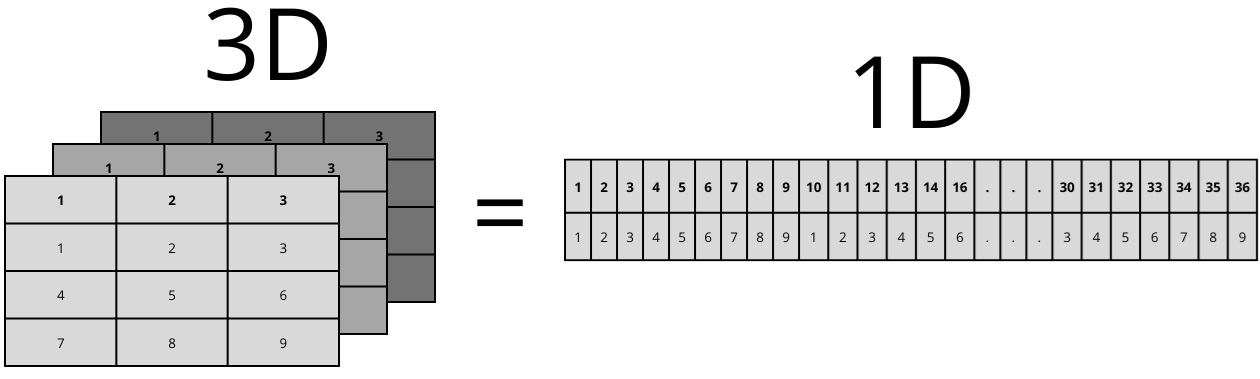

In [11]:
gamma = 1.8 #asignamos el valor gamma para la correcion
coreccion = np.zeros(256, dtype=np.uint8) #creamos un array en 0

for i in range(256):
    coreccion[i] = np.clip(((i / 255.0)**gamma) * 255.0, 0, 255) #los nuevos valores que se van a asignar para cada pixel en

image_1D = imagen.flatten() #pasamos una imagen en 3d a un array unidimensional
imagen_resultado = np.copy(image_1D)

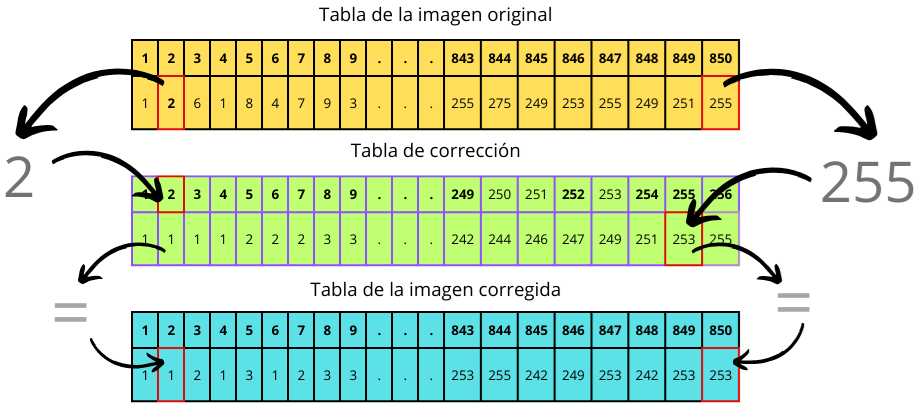

In [12]:
# Aplica la transformación de la tabla a la imagen
for i in range(len(image_1D)):
    imagen_resultado[i] = coreccion[image_1D[i]]

imagen_resultado = imagen_resultado.reshape(imagen.shape)

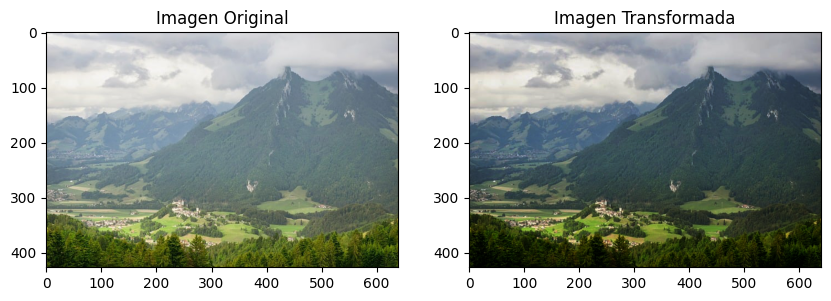

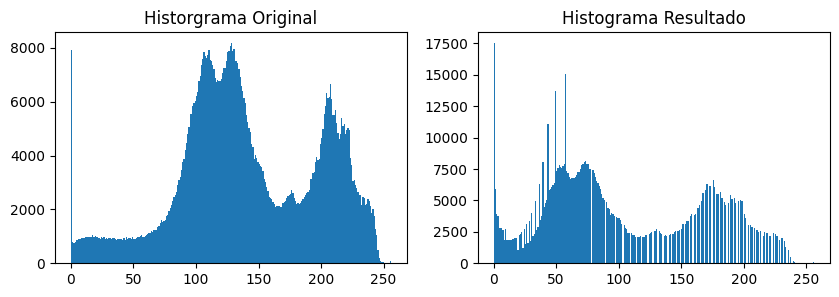

In [13]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,6)
ax[0].imshow(imagen)
ax[0].set_title("Imagen Original")

ax[1].imshow(imagen_resultado)
ax[1].set_title("Imagen Transformada")
plt.show()

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,3)
ax[0].hist(imagen.ravel(),256,[0,256])
ax[0].set_title("Historgrama Original")
ax[1].hist(imagen_resultado.ravel(),256,[0,256])
ax[1].set_title("Histograma Resultado")
plt.show()

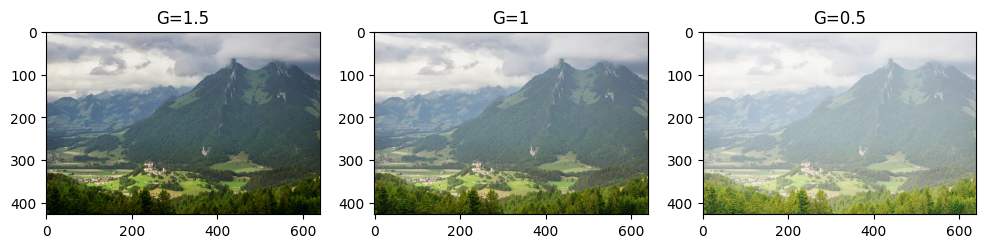

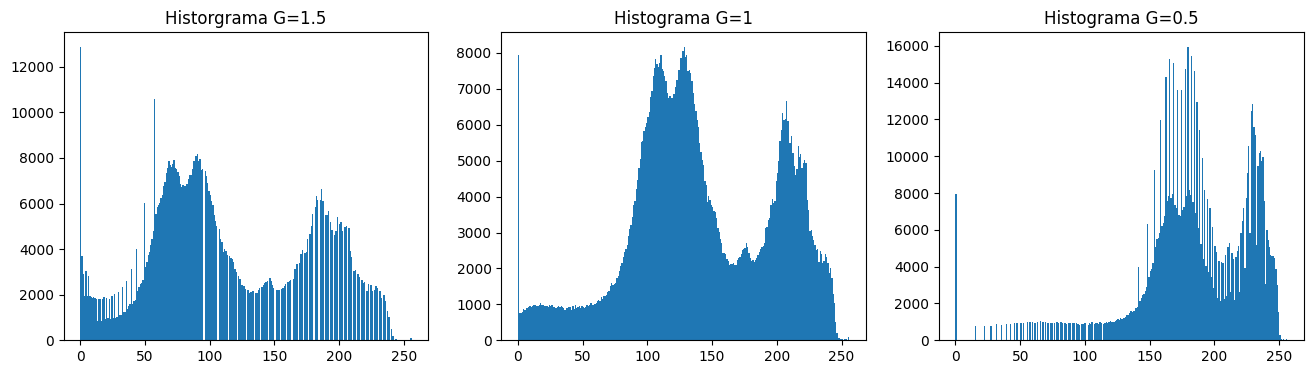

In [14]:
Directorio = os.listdir('Contraste/')
ruta = 'Contraste/'
img_ruta = ruta + Directorio[0]
imagen = mpimg.imread(img_ruta)

gamma = [1.5,1,0.5] #asignamos el valor gamma para la correcion
resultado01=[]
resultado02=[]
resultado02=[]

correccion = np.zeros(256, dtype=np.uint8)

for j in range(len(gamma)):
    
    for i in range(256):            
        correccion[i] = np.clip(((i / 255.0)**gamma[j]) * 255.0, 0, 255)
        image_1D = imagen.flatten()
        imagen_resultado = np.copy(image_1D)   
        for i in range(len(image_1D)):
            imagen_resultado[i] = correccion[image_1D[i]]
        imagen_resultado = imagen_resultado.reshape(imagen.shape)
            
    if j == 0:
        resultado01 = imagen_resultado

    elif j == 1:
        resultado02 = imagen_resultado

    elif j == 2:
        resultado03 = imagen_resultado

    
                
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,10)
ax[0].imshow(resultado01)
ax[0].set_title("G=1.5")

ax[1].imshow(resultado02)
ax[1].set_title("G=1")

ax[2].imshow(resultado03)
ax[2].set_title("G=0.5")
plt.show()

fig, ax = plt.subplots(1,3)
fig.set_size_inches(16,4)
ax[0].hist(resultado01.ravel(),256,[0,256])
ax[0].set_title("Historgrama G=1.5")
ax[1].hist(resultado02.ravel(),256,[0,256])
ax[1].set_title("Histograma G=1")
ax[2].hist(resultado03.ravel(),256,[0,256])
ax[2].set_title("Histograma G=0.5")
plt.show()

# Resultados

Los histogramas muestran una mayor disminucion en rangos entre 150 y 250 es decir zonas claras, dejando notar mas las zonas oscuras de la imagen. La disminucion de contraste o aumento de contraste esta en en funcion de la variable gamma. Para la imagene usadas en el ejercicio la aplicacion de una exponencial arriba de 1 favorece en la imagen para la obtencion de informacion mientras que una exponencial abajo de 1 las zonas claras opacan la imagen

# Referencias

8.2. Matriz de convolución. (s. f.). https://docs.gimp.org/2.6/es/plug-in-convmatrix.html

Ali, A. (2017, 22 agosto). Filtrado de imagen en Python. Code Envato Tuts+. https://code.tutsplus.com/es/image-filtering-in-python--cms-29202t

Brillo, contraste y corrección gamma. (2012, 3 septiembre). Procesamiento Digital de Imagenes. https://procesamientodigitalimagenes.wordpress.com/2012/09/03/brillo-contraste-y-correccion-gamma/

Mehmood, S. B. (2022, 13 junio). Filtro mediano de OpenCV. Delft Stack. https://www.delftstack.com/es/howto/python/opencv-median-filter/

OpenCV. (2023, 1 diciembre). OpenCV - Open Computer Vision Library. https://opencv.org/

OpenCV + Python: Añadir ruido sal y pimienta en imágenes. (20d. C., octubre 8). [Vídeo]. https://www.youtube.com/watch?v=xQxVnU89ano. https://www.youtube.com/watch?v=xQxVnU89ano

Pairwise data — MatPlotlib 3.8.2 documentation. (s. f.). https://matplotlib.org/stable/plot_types/basic/index.html

Programacionpython. (2020, 11 abril). SUAVIZACIÓN y ELIMINACIÓN DE RUIDO EN IMÁGENES DIGITALES, CON «OpenCV». El Programador Chapuzas. https://programacionpython80889555.wordpress.com/2020/03/31/suavizacion-y-eliminacion-de-ruido-en-imagenes-digitales-con-opencv/

Programacionpython. (2023, 3 agosto). AÑADIENDO CONTRASTE a UNA IMAGEN a COLOR, EN PYTHON, CON «OpenCV». El Programador Chapuzas. https://programacionpython80889555.wordpress.com/2023/07/31/anadiendo-contraste-a-una-imagen-a-color-en-python-con-opencv/

Tratamiento de imágenes con ruido  impulsivo mediante reglas difusas y  algoritmos genéticos. (2015). [Trabajo Fin de Grado]. E.T.S. de Ingeniería Industrial,  Informática y de Telecomunicación.

UNIR México | Tu universidad en línea. (2023, 27 octubre). UNIR México. https://mexico.unir.net/